# Versionamento

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix, recall_score, precision_score
import datetime

# Load Data

In [2]:
pwbdatafile = '..\\data\\validation.csv'
pwbds = pd.read_csv(pwbdatafile)

In [3]:
pwbds.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/11/99 0:00,0,0.477208,-0.104710,-1.819225,-186.22654,-0.401301,41.141487,-0.169256,-0.011064,...,8.229416,1.231258,0.567104,10.783145,234.179529,2.863048,0.021239,0.029368,-0.003004,0
1,5/11/99 0:02,0,0.588127,-0.123643,-1.651525,-186.22654,-0.399607,40.016945,-0.160191,-0.011064,...,8.229416,1.231258,0.567936,20.622379,233.349969,2.863048,0.021239,0.149920,-0.003001,0
2,5/11/99 0:04,0,0.552452,-0.136531,-1.995832,-186.22654,-0.397898,39.376534,-0.159185,-0.011064,...,8.229416,1.231258,0.568769,14.908267,233.142572,3.107189,0.019637,0.830790,-0.002997,0
3,5/11/99 0:06,0,0.601282,-0.119620,-1.924438,-186.22654,-0.398264,38.897499,-0.159185,-0.011064,...,8.229416,1.231258,0.569601,20.143619,233.142572,2.798961,0.019637,1.502955,-0.002993,0
4,5/11/99 0:08,0,0.498503,-0.423054,-1.889417,-185.57540,-0.399699,37.865151,-0.159185,-0.000993,...,8.229416,1.231258,0.570434,14.103336,233.142572,2.863048,0.019637,0.229395,-0.002990,0


In [4]:
pwbds.shape

(682, 63)

In [5]:
pwbds.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,0.005865,0.258190,2.539700,0.156491,-160.348873,-0.452942,14.698747,-0.036907,-0.009338,-0.009151,...,8.508357,1.353968,0.573884,24.978755,153.573941,2.932221,0.011168,0.609391,-0.003280,0.001466
std,0.076415,0.328700,2.892634,2.013393,30.235047,0.313131,34.245703,0.076294,0.018982,0.135102,...,0.915855,0.218542,0.050837,13.621668,90.048908,0.514681,0.011945,0.477102,0.000564,0.038292
min,0.000000,-0.794381,-10.012250,-17.020494,-188.203290,-1.256327,-59.605583,-0.169256,-0.043798,-0.120087,...,7.314377,1.231258,0.469527,-8.847470,-30.306418,1.642284,-0.012366,-0.348371,-0.004330,0.000000
25%,0.000000,0.005407,-0.373798,-1.446568,-185.339765,-0.702494,7.306557,-0.109135,-0.021135,-0.059966,...,7.948228,1.231258,0.532608,15.754581,114.621606,2.557811,-0.002121,0.156939,-0.003788,0.000000
50%,0.000000,0.363779,2.816359,0.349962,-182.324285,-0.419092,31.653267,-0.039246,-0.011064,-0.030057,...,8.229416,1.231258,0.585827,22.616459,147.928903,2.863048,0.017328,0.521536,-0.003214,0.000000
75%,0.000000,0.488240,5.023174,1.121761,-127.943912,-0.206179,39.400544,0.023560,-0.000993,-0.010220,...,8.704697,1.409481,0.610885,30.458560,234.176515,3.305554,0.021661,1.030142,-0.002769,0.000000
max,1.000000,1.393746,7.251155,5.454558,-108.807050,0.531240,49.283486,0.100832,0.069566,1.533253,...,10.213303,2.137264,0.663946,76.827213,252.147455,5.115306,0.025988,1.552485,-0.002441,1.000000


In [6]:
pwbds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 63 columns):
time    682 non-null object
y       682 non-null int64
x1      682 non-null float64
x2      682 non-null float64
x3      682 non-null float64
x4      682 non-null float64
x5      682 non-null float64
x6      682 non-null float64
x7      682 non-null float64
x8      682 non-null float64
x9      682 non-null float64
x10     682 non-null float64
x11     682 non-null float64
x12     682 non-null float64
x13     682 non-null float64
x14     682 non-null float64
x15     682 non-null float64
x16     682 non-null float64
x17     682 non-null float64
x18     682 non-null float64
x19     682 non-null float64
x20     682 non-null float64
x21     682 non-null float64
x22     682 non-null float64
x23     682 non-null float64
x24     682 non-null float64
x25     682 non-null float64
x26     682 non-null float64
x27     682 non-null float64
x28     682 non-null int64
x29     682 non-null float64
x

In [7]:
pwbds['y'].value_counts()

0    678
1      4
Name: y, dtype: int64

In [8]:
pwbds.loc[pwbds['y']==1]

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
213,5/11/99 7:06,1,0.473104,-10.012250,-17.020494,-185.11698,0.062398,38.054787,-0.049319,-0.011064,...,8.229416,1.231258,0.594217,13.919498,234.659234,2.924083,0.015218,0.727686,-0.002773,0
537,5/11/99 18:02,1,0.334983,0.924764,-9.097739,-130.71195,-0.081309,9.134224,-0.069155,-0.041277,...,9.372482,1.869686,0.540135,36.397037,116.163202,3.473400,0.017191,0.177950,-0.004220,0
563,5/11/99 19:06,1,0.626861,-8.975841,-9.826181,-181.90206,-0.709605,-55.156898,0.080690,-0.011064,...,10.186691,2.137264,0.566448,48.454898,16.143762,4.175304,0.023567,0.105669,-0.004327,1
633,5/11/99 22:08,1,0.782480,-8.826300,-9.818126,-183.27479,-1.081210,-51.287376,0.042521,-0.011064,...,10.213303,1.587947,0.641280,37.670230,12.305688,4.114269,0.024467,0.962229,-0.003187,0


# Feature Selection and Scaling

In [9]:
# Feature Selection
# List of considered Features
# Redução de feature usando resultado do PCA (notebook DimRedPCAOnTS)
FEATURES = [
#    'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x13','x14','x15','x17','x18','x19','x20',
#    'x21','x22','x24','x26','x27','x28','x29','x30','x32','x33','x34','x35','x36','x37','x38','x39','x40',
#    'x41','x42','x43','x44','x45','x46','x47','x48','x49','x50','x54','x55','x56','x57','x60',
#    'y','x1','x5','x8','x10','x13','x14','x15','x17','x18','x19','x20','x21','x22','x26','x28','x30','x31','x34',
#    'x35','x37','x38','x40','x41','x43','x46','x48','x49','x51','x53','x54','x55','x58'

    'y','x1', 'x2','x3', 'x4', 'x5', 'x8', 'x9', 'x10', 'x11', 'x13','x14', 'x17', 'x18', 'x19',  'x20', 'x21', 'x26', 'x28', 
    'x30', 'x31','x34', 'x35', 'x37',  'x40', 'x41', 'x43', 'x46','x48', 'x51', 'x53', 'x54', 'x55', 'x57', 'x56','x58', 'x60'
]
# Create the dataset with features and filter the data to the list of FEATURES
pwbds_filtered = pwbds[FEATURES]

# Print the tail of the dataframe
pwbds_filtered.tail()

,y,x1,x2,x3,x4,x5,x8,x9,x10,x11,...,x46,x48,x51,x53,x54,x55,x57,x56,x58,x60
677,0,0.058263,3.580074,0.172983,-117.19621,-0.875498,-0.011064,-0.030057,-0.028270,0.637770,...,0.060373,-0.170767,29.984624,1.810115,0.658113,51.806217,3.809093,-18.432181,0.018599,-0.002549
678,0,0.082467,3.447845,0.000929,-114.93469,-0.900156,-0.011064,-0.030057,-0.018352,0.753344,...,-1.188445,-0.168661,29.984624,1.814510,0.657859,51.038150,3.168224,-22.643729,0.017298,-0.002536
679,0,0.044266,3.334125,-0.047500,-111.68865,-0.924815,-0.011064,-0.030057,-0.008280,0.735024,...,-0.865069,-0.166548,29.984624,1.818904,0.657605,56.846500,3.296398,-13.251669,0.017280,-0.002524
680,0,0.031158,3.261729,-0.060709,-111.80003,-0.949473,-0.011064,-0.030057,-0.008280,0.785527,...,-0.312441,-0.164442,29.984624,1.823299,0.657352,47.445133,3.418468,-10.791876,0.017263,-0.002511
681,0,-0.003082,3.194289,-0.119495,-113.42007,-0.974131,-0.011064,-0.019986,-0.008280,0.670426,...,-0.063044,-0.162329,29.984624,1.827693,0.657098,55.647281,3.665660,-13.324896,0.017245,-0.002499


In [10]:
# This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
from sklearn.preprocessing import RobustScaler, MinMaxScaler 

# Get the number of rows in the data
nrows = pwbds_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(pwbds_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)
pwbds_scaled = pd.DataFrame(
    np_data_scaled,
    columns=FEATURES
)

(682, 37)


# Shaping & Splitting

In [11]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        
        # if index is larger than the size of the dataset, we stop
        if end_ix > x_data.shape[0]:
            break
        
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix-1]
        
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

## Dataset for Model 1

In [12]:
pwbds_m1 = pwbds_scaled.copy()
#pwbds_m1.drop('NEXT_H',axis='columns', inplace=True)
yds_m1 = pwbds_m1.pop('y')

In [13]:
num_steps = 30 # Intervalo entre medições é de 2 segundos
x_new, y_new = lstm_data_transform(pwbds_m1, yds_m1, num_steps=num_steps)
print ("The new shape of x is", x_new.shape)

The new shape of x is (653, 30, 36)


In [14]:
np.where(y_new==1)

(array([184, 508, 534, 604], dtype=int64),)

In [15]:
import tensorflow as tf
from tensorflow import keras

model_m1 = keras.models.load_model('../data/pwb_regression')


C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\pyth

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-pac

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
# Verify the architecture 
print(model_m1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 120)           75360     
_________________________________________________________________
dropout (Dropout)            (None, 30, 120)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                43440     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 60)                3660      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1

In [17]:
test_predict = model_m1.predict(x_new)

In [18]:
np.where(yds_m1 == 1)

(array([213, 537, 563, 633], dtype=int64),)

In [19]:
yds_m1.tail(40)

642    0.0
643    0.0
644    0.0
645    0.0
646    0.0
647    0.0
648    0.0
649    0.0
650    0.0
651    0.0
652    0.0
653    0.0
654    0.0
655    0.0
656    0.0
657    0.0
658    0.0
659    0.0
660    0.0
661    0.0
662    0.0
663    0.0
664    0.0
665    0.0
666    0.0
667    0.0
668    0.0
669    0.0
670    0.0
671    0.0
672    0.0
673    0.0
674    0.0
675    0.0
676    0.0
677    0.0
678    0.0
679    0.0
680    0.0
681    0.0
Name: y, dtype: float64

In [20]:
test_predict.shape

(653, 1)

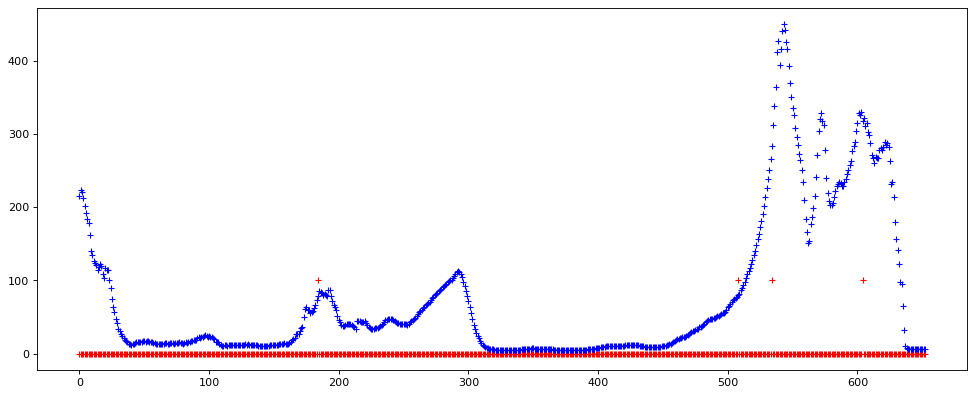

In [21]:
figure(figsize=(15, 6), dpi=80)
plt.plot(y_new*100,'r+')
plt.plot(test_predict,'b+')

In [22]:
results = pd.DataFrame(y_new)
results['preds']=test_predict
results.columns=['true','preds']
results['dif']=round(results['true']-results['preds'],2)
results.to_csv('results.csv')

In [23]:
results.describe()

,true,preds,dif
count,653.000000,653.000000,653.000000
mean,0.006126,75.667152,-75.660904
std,0.078086,98.654137,98.647286
min,0.000000,5.410994,-449.490000
25%,0.000000,11.391513,-91.900000
50%,0.000000,32.050533,-32.050000
75%,0.000000,91.900726,-11.390000
max,1.000000,449.491943,-5.410000


## Truth

### Quantas quebras realmente ocorreram?

In [25]:
# Registro de quebras são aqueles onde RUL==0 (y_test==0)
np.unique(y_new==0,return_counts=True)

(array([False,  True]), array([  4, 649], dtype=int64))

### Quando ocorreram?

In [28]:
break_moments= np.where(y_new == 1)

In [29]:
list(break_moments)

[array([184, 508, 534, 604], dtype=int64)]

## Previsões

### Quantas indicações abaixo de x minutos? 

In [30]:
np.unique(test_predict < 90 ,return_counts=True)

(array([False,  True]), array([165, 488], dtype=int64))

### Quando ocorreram?

In [31]:
np.where(test_predict < 90)[0]

array([ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 20

## Acertos
### Quantos e quando?

In [32]:
when_pred = np.where(test_predict < 90)[0].tolist()
when_true = np.where(y_new == 0)[0].tolist()

In [33]:
commonalities = set(when_pred) - (set(when_pred) - set(when_true))

In [34]:
len(commonalities)

486

In [35]:
commonalities

{24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 2

In [ ]:
import shap  # package used to calculate Shap values

# use Deep SHAP to explain test set predictions
#k_explainer = shap.KernelExplainer(model_1.predict_proba, x_test)
#k_shap_values = k_explainer.shap_values(x_test.reshape(14315*30,32))
#shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], x_test)